# Trabalho BI - Tópicos Avançados
## A base do trabalho contém todas as reclamações fundamentadas que foram audiência no ano de 2017.
### O notebook cria as seguintes WordClouds com as 40 empresas mais reclamadass, utilizando a coluna 'empresa':
####  - Criação da WordCloud utilizando Expressões Regulares para Pré-processamento.
####  - Criação da WordCloud utilizando Expressões Regulares, Stopwords, Remoção de Acentuação e Tokenização para Pré-processamento.

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import unicodedata
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregamento da base
data = pd.read_csv(r'C:\Users\rfsantos\OneDrive - Mongeral Aegon\2020\Modulos\BI\NLP\Trabalho\Arquivos fonte finais\base reclamacoes Procon.csv', sep = ';', encoding ='windows-1252', keep_default_na = True)

In [3]:
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [4]:
# Existem valores nulos (por coluna)?
data.isna().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

In [5]:
# Remoção de linhas com valores nulos
data = data.dropna(subset=['empresa','problema']).astype(str)

## WordCloud com as 40 empresas mais reclamadas no Procon em 2017

### - Criação da WordCloud utilizando Expressões Regulares para Pré-processamento.

In [6]:
# Criação de dataframe com a coluna empresa
data_total_1 = pd.DataFrame({'empresa':data.empresa.str.lower()}) # ---> Formatação de todas as palavras em minúsculas

In [7]:
# Utilização de expressões regulares para limpeza do texto
dicionario_1 = {' s/a':'',' s.a':'',' ltda':'',' s/s':'',',':'',\
                     '\(':'','\)':'',"-":'','\.com':'','\.br':'',r"^\t":'',' epp':'',' lta':'','@':''}
data_total_1 = data_total_1.replace({'empresa': dicionario_1},regex=True)

In [8]:
# Utilização de expressões regulares para limpeza do texto
dicionario_2 = {'_sa$':'','\.':'','/':' ',' ':'_'}
data_total_1 = data_total_1.replace({'empresa': dicionario_2},regex=True)

In [9]:
# Há nome de empresas com a grafia com e sem acento e para o Python são strings diferentes, interferindo na geração da WordCloud
data_total_1[data_total_1.empresa.str.contains(r'telefônica(?!$)')]

,empresa
1112,telefônica_brasil
1173,telefônica_brasil__vivo
1214,telefônica_brasil
1478,telefônica_brasil__vivo
1493,telefônica_brasil__vivo
...,...
40548,telefônica_brasil
41022,telefônica_brasil
41432,telefônica_brasil__vivo
41990,telefônica_brasil__vivo


In [10]:
# Criação de uma string única com todas as ocorrências dos nomes das empresas
string_total_1 = " ".join([text for text in data_total_1['empresa']])

### - Criação da WordCloud utilizando Expressões Regulares, Stopwords, Tokenização para Pré-processamento

In [11]:
# Criação de dataframe com a coluna empresa
data_total_2 = pd.DataFrame({'empresa':data.empresa.str.lower()}) # ---> Formatação de todas as palavras em minúsculas

In [12]:
# Utilização de expressões regulares para limpeza do texto
dicionario_1 = {' s/a':'',' s.a':'',' s/s':'',',':'','\(':'','\)':'',"-":'','\.com':'','\.br':'',r"^\t":'','@':'','–':''}
data_total_2 = data_total_2.replace({'empresa': dicionario_1},regex=True)

In [13]:
# Utilização de expressões regulares para limpeza do texto
dicionario_2 = {'\.':'','/':' '}
data_total_2 = data_total_2.replace({'empresa': dicionario_2},regex=True)

In [14]:
# Expressões regulares - remoção de todas as palavras com números e pontuação
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)

data_total_2['empresa'] = data_total_2.empresa.map(alphanumeric).map(punc)

In [15]:
# Remoção de acentos
data_total_2['empresa'] = data_total_2.empresa.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [16]:
# Tokenização da coluna empresa
data_total_2['empresa'] = data_total_2.empresa.map(word_tokenize)

In [17]:
# Remoção de StopWords
stopword_list = nltk.corpus.stopwords.words('portuguese')
new_stopwords = ['d','co','kd','texto','object','dtype','i','c','outros','etc','sa','ltda','ltd','lta','epp']
stopword_list.extend(new_stopwords)

stop_lambda = lambda x: [y for y in x if y not in stopword_list]

data_total_2['empresa'] = data_total_2.empresa.map(stop_lambda)

In [18]:
# Após a remoção dos acentos --> Apuração de frequência correta para cada empresa
data_total_2.empresa.value_counts()

[telefonica, brasil]                        1158
[claro]                                     1039
[tim, celular]                               684
[samsung, eletronica, amazonia]              518
[caixa, economica, federal]                  507
                                            ... 
[perfil, motos, comercio, servicos]            1
[disal, administradora, consorcio]             1
[companhia, eletricidade, estado, bahia]       1
[felix, viagens, turismo]                      1
[bela, saude, corretora, seguros]              1
Name: empresa, Length: 7594, dtype: int64

In [19]:
# Criação de lista com as listas de tokens
tokens_list = [] 
for row in data_total_2.empresa:
    tokens_list.append(row)


In [20]:
# Concatenação dos tokens em ngrams
ngram_list = []
for words in tokens_list:
    ngram_list.append(' '.join(words))

In [21]:
# Criação de dicinário com a frequência dos ngrams
words = ngram_list
words_freq = {} 
for items in words: 
    words_freq[items] = words.count(items)

## WordClouds

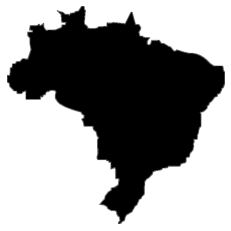

In [22]:
# Definição de imagem para formato da Wordcloud todas as empresas 
brazil_mask = np.array(Image.open(r'C:\Users\rfsantos\OneDrive - Mongeral Aegon\2020\Modulos\BI\NLP\Trabalho\Arquivos fonte finais\brazil-map.png'))
img=mpimg.imread(r'C:\Users\rfsantos\OneDrive - Mongeral Aegon\2020\Modulos\BI\NLP\Trabalho\Arquivos fonte finais\brazil-map.png')
imgplot = plt.imshow(img)
plt.axis("off");

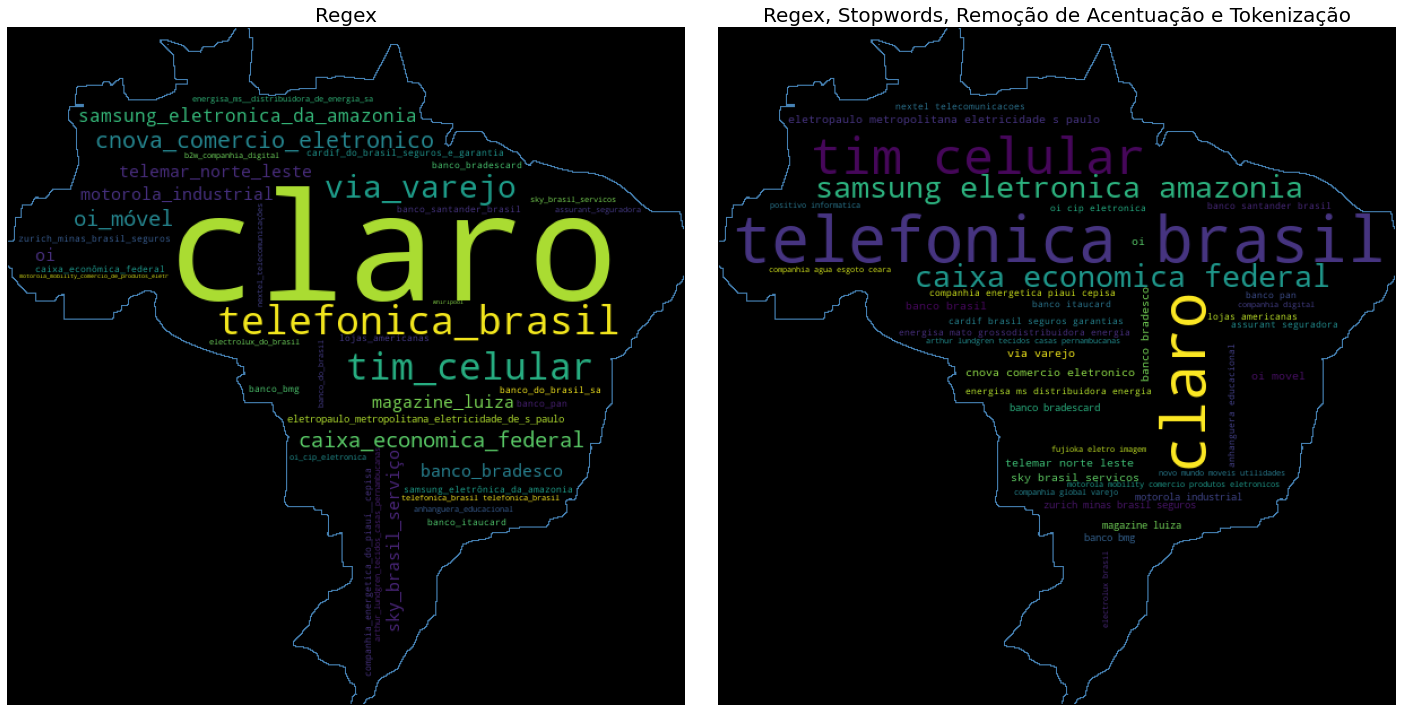

In [23]:
# Criação das WordClouds 
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=True)

## Utilização Expressões Regulares para Pré-processamento
cloud1 = WordCloud(background_color='black',width=1600, height=800,max_font_size=200,max_words=40, mask=brazil_mask, contour_width=1, contour_color='steelblue').generate(string_total_1)
fig.add_subplot(ax1)
plt.gca().imshow(cloud1)
plt.gca().set_title('Regex', fontsize=20)
plt.gca().axis('off')

## Utilização de Expressões Regulares, Stopwords, Remoção de Acentuação e Tokenização para Pré-processamento
cloud2 = WordCloud(background_color='black',width=1600,height=800,max_font_size=200,max_words=40, mask=brazil_mask,contour_width=1, contour_color='steelblue').generate_from_frequencies(words_freq)
fig.add_subplot(ax2)
plt.gca().imshow(cloud2)
plt.gca().set_title('Regex, Stopwords, Remoção de Acentuação e Tokenização', fontsize=20)
plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('empresas-total.png')
plt.show()